In [1]:
using HDF5
using Plots
using GR
#using Colors
#Plots.GRBackend()

In [15]:
filename = "BrioWu_0011.hdf5"
#filename = "BrioWu_START.hdf5"
#filename = "BrioWu_START_HUGEVISK.hdf5"
#filename = "BrioWu_START_sDIVnVSI.hdf5"
#filename = "BrioWu.hdf5"
pos = h5read(filename,"PartType0/Coordinates")
Bfl = h5read(filename,"PartType0/Bfield") 
Vel = h5read(filename,"PartType0/Velocities")
alp = h5read(filename,"PartType0/EPalpha")
bet = h5read(filename,"PartType0/EPbeta")
Ids = h5read(filename,"PartType0/ParticleIDs")
h   = h5read(filename,"PartType0/SmoothingLengths")
rho = h5read(filename,"PartType0/Densities")
divB = h5read(filename,"PartType0/divB")
head = h5readattr(filename,"Header")
print("Leyendo ",filename," at time: ",head["Time"],"\n")
x = pos[1,:]
y = pos[2,:]
z = pos[3,:]
Bx = Bfl[1,:]
By = Bfl[2,:]
Bz = Bfl[3,:]
Vx = Vel[1,:]
Vy = Vel[2,:]
Vz = Vel[3,:]


v2 = Vx.*Vx.+Vy.*Vy.+Vz.*Vz
b2 = By.*By.+By.*By.+Bz.*Bz
b2 = bet
print(minimum(b2)," ",maximum(b2),"\n")
Npart=size(Ids,1)

Leyendo BrioWu_0011.hdf5 at time: [0.2]
-2.74847 -0.0017586137


589824

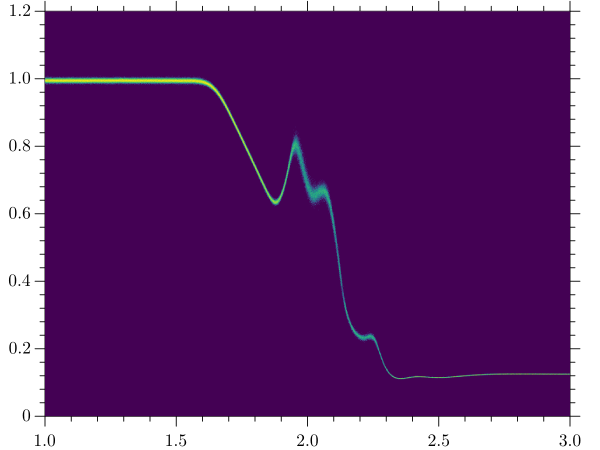

In [16]:

p1=GR.shade(x,rho,xlim=[1.0,3],ylim=[0,1.2])

#p2=shade(z,Bx)
#p2=GR.scatter(x,bet,xlim=[2.5,3],ylim=[-1,1.2])
#p3=shade(y,Bx)
#p4=shade(z,By)

#!Plots.plot(p1,layout = 4, legend = false)
#GR.plot(p1,p2,layout=4)

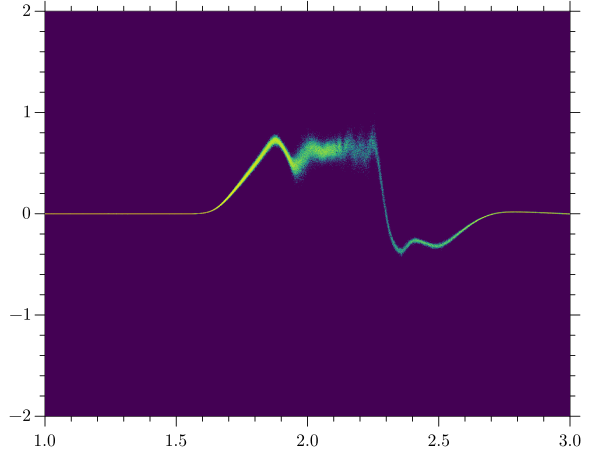

In [18]:
gr()
#openws(1,1,320)
#subplot(3,2,3)
#subplot(3,2,1)
p1=shade(x,divB,xlim=[1,3], ylim=[-2,2])
#subplot(1,1,1)
p2=shade(x,Vx,xlim=[1,3], ylim=[-2,2])
#GR.hexbin(x,Vx,xlim=[1,3],ylim=[-2,2])
#Plots.plot(p1)
#GR.plot(p2)

In [19]:
function read_snap(filename :: String)
    
    pos  = h5read(filename,"PartType0/Coordinates")
    Bfl  = h5read(filename,"PartType0/Bfield") 
    Vel  = h5read(filename,"PartType0/Velocities")
    alp  = h5read(filename,"PartType0/EPalpha")
    bet  = h5read(filename,"PartType0/EPbeta")
    divB = h5read(filename,"PartType0/divB")
    #Ids  = h5read(filename,"PartType0/ParticleIDs")
    h    = h5read(filename,"PartType0/SmoothingLengths")
    rho  = h5read(filename,"PartType0/Densities")
    head = h5readattr(filename,"Header")

    print("Leyendo ",filename," at time: ",head["Time"],"\n")
    x = pos[1,:]
    y = pos[2,:]
    z = pos[3,:]
    bx = Bfl[1,:]
    by = Bfl[2,:]
    bz = Bfl[3,:]
    Vx = Vel[1,:]
    Vy = Vel[2,:]
    Vz = Vel[3,:]
    
    v2 = Vx.*Vx.+Vy.*Vy.+Vz.*Vz
    b2 = by.*by.+by.*by.+bz.*bz
    
    Npart=size(b2,1)
        
    print("Min x:",minimum(x)," / Max x:",maximum(x),"\n")
    print("Min y:",minimum(y)," / Max y:",maximum(y),"\n")
    print("Min z:",minimum(z)," / Max z:",maximum(z),"\n")
    print("Min h:",minimum(h)," / Max h:",maximum(h),"\n")
    (Dict(:H => head, :x=>pos, :bfl=> Bfl, :b2=>b2, :v=>Vel, :v2=>v2, 
            :divB=>divB, :rho=>rho, :hsml=>h,:bet=> bet,Npart=> Npart))
end

function do_heat(data,what,Nmax)
    #Nmax=128
    #x=x.-minimum(x)
    #y=y.-minimum(y)
    #b2=data[what]
    b2=what
    Npart=size(b2,1)
    Lbox=1.0#+maximum(x)
    A = ones((Nmax, Nmax))*minimum(b2)
    grid = ones((Nmax, Nmax))
    #grid = [Set{Int}() for x=1:Nmax, y=1:Nmax];
    #insert(grid) = p -> push!(grid[trunc(Int, p.x/Lbox*Nmax), trunc(Int, p.y/Lbox*Nmax)], p.n);
    #foreach(insert(grid), data)
    x=data[:x][1,:]
    y=data[:x][2,:]
    for ind = 1:Npart
        i,j = trunc(Int, x[ind]/Lbox*Nmax+1), trunc(Int, y[ind]/Lbox*Nmax+1)
        A[i,j] += b2[ind]
        grid[i,j] += 1 
    end
    AA=log10.(A./grid)
    #AA=(A./grid)
    (AA)
end


do_heat (generic function with 1 method)

In [6]:
rbase=read_snap("BrioWu_START.hdf5")

Leyendo BrioWu_START.hdf5 at time: [0.2]
Min x:5.360178819302745e-6 / Max x:3.9999997471801776
Min y:3.968808145843811e-7 / Max y:0.9999954322003891
Min z:2.3646547073763458e-6 / Max z:0.9999986972610163
Min h:0.016316378 / Max h:0.04248369


Dict{Any, Any} with 11 entries:
  :bfl   => Float32[-0.743172 -0.764661 … -0.71108 -0.773786; 0.576713 0.555176…
  :rho   => Float32[0.528402, 0.544199, 0.550654, 0.45028, 0.54758, 0.517771, 0…
  :b2    => Float32[0.666079, 0.619408, 0.667591, 0.584623, 0.583257, 0.602765,…
  :v2    => Float32[0.494021, 0.433612, 0.517986, 0.772985, 0.502717, 0.545817,…
  :hsml  => Float32[0.0238667, 0.0236318, 0.0235393, 0.0251708, 0.0235812, 0.02…
  589824 => 589824
  :x     => [0.0496235 0.0570624 … 3.9663 3.91562; 0.0814639 0.00582999 … 0.958…
  :v     => Float32[-0.702817 -0.656192 … -1.02731 -0.841943; -0.00277 0.045208…
  :divB  => Float32[0.61614, 0.0177876, -0.114594, -0.535183, -0.373004, -0.606…
  :H     => Dict{String, Any}("NumPart_Total_HighWord"=>UInt32[0x00000000, 0x00…
  :bet   => Float32[-1.8374, -1.89215, -1.86199, -1.86616, -1.87373, -1.89322, …

Leyendo BrioWu_START.hdf5 at time: [0.2]
Min x:5.360178819302745e-6 / Max x:3.9999997471801776
Min y:3.968808145843811e-7 / Max y:0.9999954322003891
Min z:2.3646547073763458e-6 / Max z:0.9999986972610163
Min h:0.016316378 / Max h:0.04248369


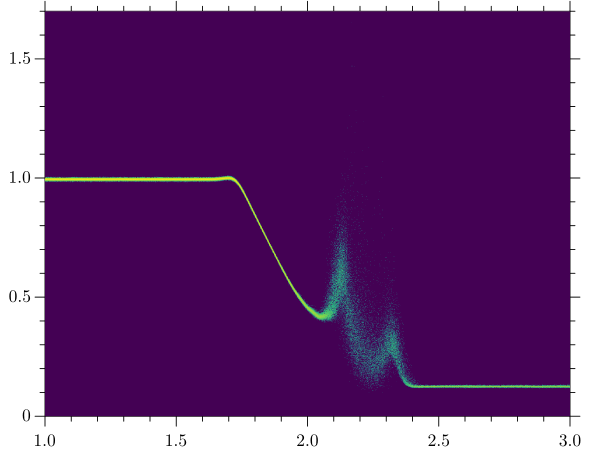

In [7]:
gr()
rbase=read_snap("BrioWu_START.hdf5")
p1=shade(rbase[:x][1,:],rbase[:v],xlim=[1,3])

In [12]:
r=read_snap("BrioWu_0011.hdf5")
#p2=shade(r[:x][1,:],r[:v][2,:])#,xlim=[1,3])
p2=shade(r[:x][1,:],r[:rho],xlim=[1,3])
gui()

LoadError: UndefVarError: read_snap not defined

In [10]:
Plots.pyplot()

LoadError: ArgumentError: Package PyPlot not found in current path:
- Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.


In [11]:
gui()

LoadError: No current plot/subplot